서울시 구별 CCTV 개수 및 범죄 사건 관계

항공우주공학전공 20171648 송지훈


서울시 구별 CCTV 갯수 및 사건 관계  

- 11_6_Analysis for crime in Seoul 

- 2020년 data를 수집하여 CCTV 설치와 사건 관련 분석


데이터 원본 사이트

- 2020년 구별 5대 범죄 발생수 및 검거수

https://data.seoul.go.kr/dataList/316/S/2/datasetView.do

- 2020년 구별 인구 수

https://data.seoul.go.kr/dataList/419/S/2/datasetView.do


- 2020년 구별 CCTV

https://opengov.seoul.go.kr/data/11124500

In [1]:
import numpy as np
import pandas as pd

# 구별 2020년 범죄 검거율

In [2]:
# 범죄 발생수
crime_happened = pd.read_excel('./2020_SEOUL_CRIME_GU.xls',usecols='B,C,D,E,G,I,K,M')
crime_happened = crime_happened.drop([0,1],axis = 0)
crime_happened = crime_happened.replace('-',0)
# crime_happened.head()

In [3]:
# 범죄 해결수
crime_solved = pd.read_excel('./2020_SEOUL_CRIME_GU.xls',usecols='B,F,H,J,L,N')
crime_solved = crime_solved.drop([0,1],axis = 0)
crime_solved = crime_solved.replace('-',0)
# crime_solved.head()

In [4]:
# 분석 결과
crime_anal = crime_happened
crime_anal['살인검거율'] = crime_solved['살인.1'] / crime_happened['살인'] *100
crime_anal['강도검거율'] = crime_solved['강도.1'] / crime_happened['강도'] *100
crime_anal['강간강제추행검거율'] = crime_solved['강간강제추행.1'] / crime_happened['강간강제추행'] *100
crime_anal['절도검거율'] = crime_solved['절도.1'] / crime_happened['절도'] *100
crime_anal['폭력검거율'] = crime_solved['폭력.1'] / crime_happened['폭력'] *100

In [5]:
# 검거율 100프로 넘는거 100으로 치환
col_list = ['살인검거율', '강도검거율', '강간강제추행검거율', '절도검거율', '폭력검거율']

for column in col_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

In [6]:
# column 이름 바꾸고 정렬
crime_anal.rename(columns = {'자치구' : '구별','합계' : '범죄', '합계.1' : '검거'}, inplace = True )
crime_anal.sort_values(by=['구별'],axis =0,inplace = True)
crime_anal.reset_index(drop = True,inplace = True)
# crime_anal.head()

# 구별 2020년 인구수

In [7]:
population = pd.read_excel('./2020_SEOUL_POPULATION_GU.xls',header=2,usecols='B,D')
population = population.drop([0],axis = 0)
population.rename(columns = {'자치구' : '구별' ,'계' : '인구 수'}, inplace = True )
population.sort_values(by=['구별'],axis =0,inplace = True)
population.reset_index(drop = True,inplace = True)
# population.head()

# 구별 2020년 CCTV 수

In [8]:
cctv = pd.read_csv('./2020_SEOUL_CCTV_GU.csv', encoding = 'cp949',skiprows=[0], thousands = ',')
cctv = cctv.drop([0],axis = 0)
cctv = cctv.drop(['총계'],axis = 1)
cctv = cctv.drop(['2012년 이전'],axis = 1)
cctv = cctv.drop(['2012년'],axis = 1)
cctv = cctv.drop(['2013년'],axis = 1)
cctv = cctv.drop(['2014년'],axis = 1)
cctv = cctv.drop(['2015년'],axis = 1)
cctv = cctv.drop(['2016년'],axis = 1)
cctv = cctv.drop(['2017년'],axis = 1)
cctv = cctv.drop(['2018년'],axis = 1)
cctv = cctv.drop(['2019년'],axis = 1)
cctv = cctv.drop(['2021년'],axis = 1)
cctv.rename(columns = {'구분': '구별','2020년' : 'CCTV 개수'},inplace = True)
cctv.sort_values(by=['구별'],axis =0,inplace = True)
cctv.reset_index(drop = True,inplace = True)
# cctv.head()

# 결과 데이터

In [9]:
crime_anal['CCTV 개수'] = cctv['CCTV 개수']
crime_anal['인구 수'] = population['인구 수']
crime_anal=crime_anal.set_index('구별')
# crime_anal.head()

In [10]:
from sklearn import preprocessing

col = ['살인','강도','강간강제추행','절도','폭력','범죄']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float))
crime_anal_normalized = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['살인검거율','강도검거율','강간강제추행검거율','절도검거율','폭력검거율','CCTV 개수','인구 수','검거']
crime_anal_normalized[col2] = crime_anal[col2]
crime_anal_normalized = crime_anal_normalized.fillna(0)
crime_anal_normalized.head()

살인        강도    강간강제추행        절도        폭력        범죄       살인검거율  \
구별                                                                            
강남구  0.500000  0.928571  1.000000  1.000000  1.000000  1.000000   83.333333   
강동구  0.250000  1.000000  0.169329  0.396131  0.292991  0.310798  100.000000   
강북구  0.750000  0.285714  0.123003  0.000000  0.242054  0.114159   88.888889   
강서구  0.833333  0.357143  0.292332  0.418701  0.497963  0.431910   90.000000   
관악구  1.000000  0.142857  0.512780  0.667434  0.566830  0.595325  100.000000   

          강도검거율  강간강제추행검거율      절도검거율      폭력검거율  CCTV 개수    인구 수    검거  
구별                                                                       
강남구   78.571429  88.559322  50.525246  84.607017      942  544055  5245  
강동구   93.333333  88.829787  47.621951  87.384140      614  463998  2662  
강북구   80.000000  83.018868  62.820513  89.433132      588  311569  2259  
강서구   83.333333  83.773585  63.351095  85.357873      356  585901  3393  
관악구  100.000000  87.096774  51.009421  90.091813      331  509803  3858

In [11]:
# crime_anal_normalized.dtypes

# 데이터 분석

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

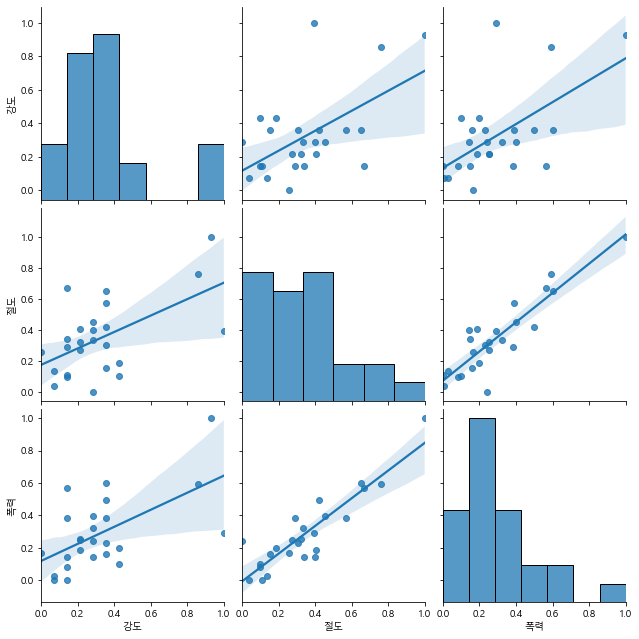

In [13]:
sns.pairplot(crime_anal_normalized, vars=["강도","절도","폭력"], kind='reg', height=3)
plt.show()

C:\Users\Jihoon Song\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Jihoon Song\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


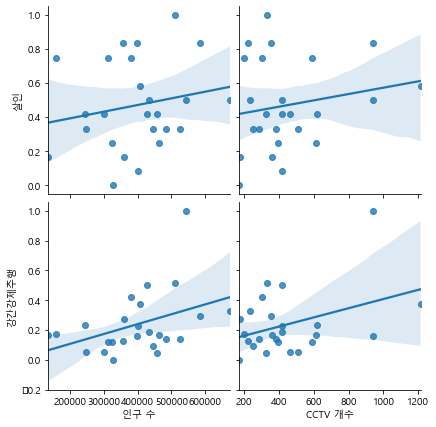

In [14]:
sns.pairplot(crime_anal_normalized, x_vars=["인구 수", "CCTV 개수"], 
             y_vars=["살인", "강간강제추행"], kind='reg', height=3)
plt.show()

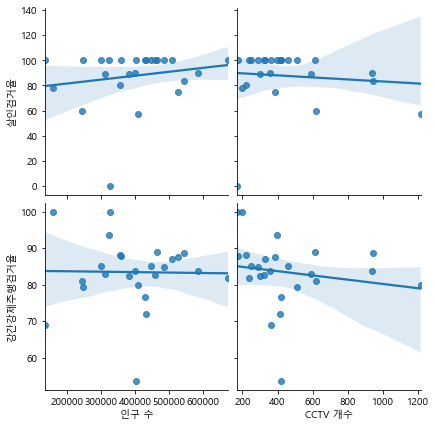

In [15]:
sns.pairplot(crime_anal_normalized, x_vars=["인구 수", "CCTV 개수"], 
             y_vars=["살인검거율", "강간강제추행검거율"], kind='reg', height=3)
plt.show()

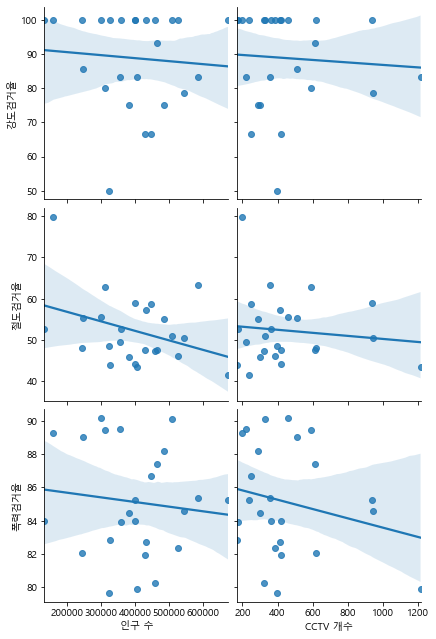

In [16]:
sns.pairplot(crime_anal_normalized, x_vars=["인구 수", "CCTV 개수"], 
             y_vars=["강도검거율","절도검거율", "폭력검거율"], kind='reg', height=3)
plt.show()

In [17]:
tmp_max = crime_anal_normalized['검거'].max()
crime_anal_normalized['검거'] = crime_anal_normalized['검거'] / tmp_max * 100
crime_anal_normalized_sort = crime_anal_normalized.sort_values(by='검거', ascending=False)
crime_anal_normalized_sort.head()

살인        강도    강간강제추행        절도        폭력        범죄       살인검거율  \
구별                                                                             
강남구   0.500000  0.928571  1.000000  1.000000  1.000000  1.000000   83.333333   
관악구   1.000000  0.142857  0.512780  0.667434  0.566830  0.595325  100.000000   
송파구   0.500000  0.857143  0.327476  0.759558  0.591687  0.624107  100.000000   
강서구   0.833333  0.357143  0.292332  0.418701  0.497963  0.431910   90.000000   
영등포구  0.583333  0.357143  0.372204  0.648549  0.602282  0.586826   57.142857   

           강도검거율  강간강제추행검거율      절도검거율      폭력검거율  CCTV 개수    인구 수          검거  
구별                                                                              
강남구    78.571429  88.559322  50.525246  84.607017      942  544055  100.000000  
관악구   100.000000  87.096774  51.009421  90.091813      331  509803   73.555767  
송파구   100.000000  81.881533  41.416221  85.233645      235  673926   67.569113  
강서구    83.333333  83.773585  63.351095  85.357873      356  585901   64.690181  
영등포구   83.333333  80.000000  43.555759  79.859311     1213  407367   64.270734

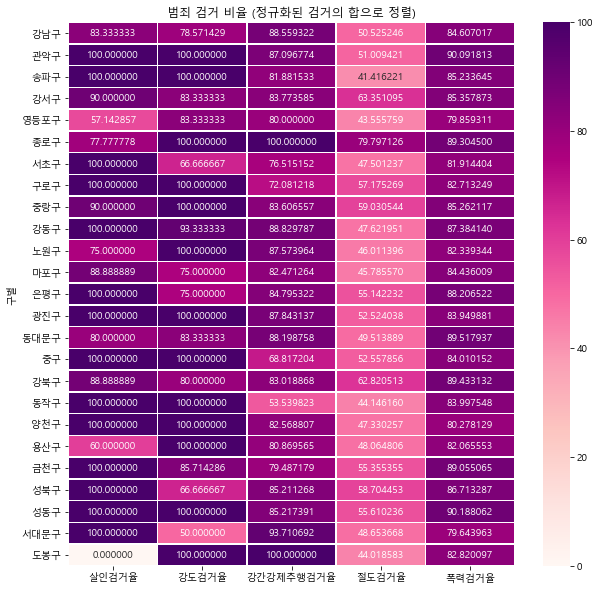

In [18]:
target_col = ['살인검거율', '강도검거율', '강간강제추행검거율', '절도검거율', '폭력검거율']

crime_anal_normalized_sort = crime_anal_normalized.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_normalized_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

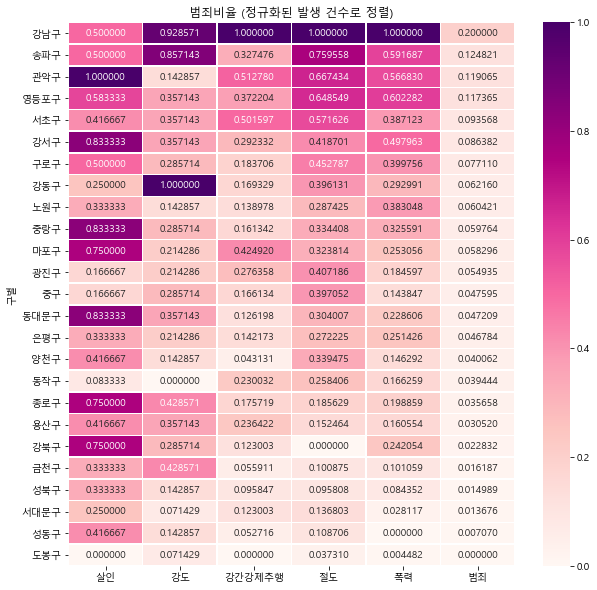

In [19]:
target_col = ['살인', '강도', '강간강제추행', '절도', '폭력', '범죄']

crime_anal_normalized['범죄'] = crime_anal_normalized['범죄'] / 5
crime_anal_normalized_sort = crime_anal_normalized.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_normalized_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [20]:
crime_anal_normalized.to_csv('./crime_in_Seoul_2020_analysis_20171648_JihoonSong.csv', sep=',',encoding='utf-8-sig')